# **Walmart-Descriptive Analysis**

## About Walmart

Walmart is an American multinational retail corporation that operates a chain of supercenters, discount departmental stores, and grocery stores from the United States. Walmart has more than 100 million customers worldwide.


## Business Problem

The Management team at Walmart Inc. wants to analyze the customer purchase behavior (specifically, purchase amount) against the customer’s gender and the various other factors to help the business make better decisions. They want to understand if the spending habits differ between male and female customers: Do women spend more on Black Friday than men? (Assume 50 million customers are male and 50 million are female).


## Dataset

The company collected the transactional data of customers who purchased products from the Walmart Stores during Black Friday. The dataset has the following features:
Dataset link: <a href="https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/293/original/walmart_data.csv?1641285094">Walmart_data.csv</a>

User_ID:	User ID
Product_ID:	Product ID
Gender:	Sex of User
Age:	Age in bins
Occupation:	Occupation(Masked)
City_Category:	Category of the City (A,B,C)
StayInCurrentCityYears:	Number of years stay in current city
Marital_Status:	Marital Status
ProductCategory:	Product Category (Masked)
Purchase:	Purchase Amount

In [134]:
%pip install binsreg

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.6/85.6 kB 427.4 kB/s eta 0:00:001m258.6 kB/s eta 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 2.0 MB/s eta 0:00:00m eta 0:00:010:00:010m
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.7/12.7 MB 3.7 MB/s eta 0:00:00m eta 0:00:010:01:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.1/10.1 MB 3.3 MB/s eta 0:00:00m eta 0:00:01:01:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 341.8/341.8 kB 1.7 MB/s eta 0:00:00 MB/s eta 0:00:01:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.7/73.7 kB 3.1 MB/s eta 0:00:00
  Attempting uninstall: pandas
    Found existing installation: pandas 1.5.3
    Uninstalling pandas-1.5.3:
      Successfully uninstalled pandas-1.5.3
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.13.5
    Uninstalling statsmodels-0.13.5:
      Successfully uninstalled statsmodels-0.13.5
Note: you may need to restart the kernel to use updated packages.


In [140]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import norm
from binsreg import binsregselect, binsreg, binsqreg, binsglm, binstest, binspwc

In [73]:
df=pd.read_csv("walmart_data.csv")

In [136]:
df

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969
...,...,...,...,...,...,...,...,...,...,...
550063,1006033,P00372445,M,51-55,13,B,1,1,20,368
550064,1006035,P00375436,F,26-35,1,C,3,0,20,371
550065,1006036,P00375436,F,26-35,15,B,4+,1,20,137
550066,1006038,P00375436,F,55+,1,C,2,0,20,365


In [137]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     550068 non-null  int64 
 1   Product_ID                  550068 non-null  object
 2   Gender                      550068 non-null  object
 3   Age                         550068 non-null  object
 4   Occupation                  550068 non-null  int64 
 5   City_Category               550068 non-null  object
 6   Stay_In_Current_City_Years  550068 non-null  object
 7   Marital_Status              550068 non-null  int64 
 8   Product_Category            550068 non-null  int64 
 9   Purchase                    550068 non-null  int64 
dtypes: int64(5), object(5)
memory usage: 42.0+ MB


In [76]:
df.isna().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category              0
Purchase                      0
dtype: int64

In [355]:
df.describe()

,User_ID,Occupation,Marital_Status,Product_Category,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,23961.000000


In [356]:
df['User_ID'].nunique()

5891

In [357]:
df['Product_ID'].nunique()

3631

In [359]:
categorical_cols=['Gender','Age','Occupation','City_Category','Stay_In_Current_City_Years']
df[categorical_cols].melt().groupby(['variable','value'])[['value']].count()/len(df)

value
variable                   value          
Age                        0-17   0.027455
                           18-25  0.181178
                           26-35  0.399200
                           36-45  0.199999
                           46-50  0.083082
                           51-55  0.069993
                           55+    0.039093
City_Category              A      0.268549
                           B      0.420263
                           C      0.311189
Gender                     F      0.246895
                           M      0.753105
Occupation                 0      0.126599
                           1      0.086218
                           2      0.048336
                           3      0.032087
                           4      0.131453
                           5      0.022137
                           6      0.037005
                           7      0.107501
                           8      0.002811
                           9      0.011437
                           10     0.023506
                           11     0.021063
                           12     0.056682
                           13     0.014049
                           14     0.049647
                           15     0.022115
                           16     0.046123
                           17     0.072796
                           18     0.012039
                           19     0.015382
                           20     0.061014
Stay_In_Current_City_Years 0      0.135252
                           1      0.352358
                           2      0.185137
                           3      0.173224
                           4+     0.154028

1.~ 80% of the users are between the age 18-50 (40%: 26-35, 18%:
18-25, 20%: 36-45)

2.75% of the users are Male and 25% are Female

3.60% Single, 40% Married

4.35% Staying in the city from 1 year, 18% from 2 years, 17% from 3
years and so on.

5.Total of 20 product categories are there

6.There are 20 differnent types of occupations in the city

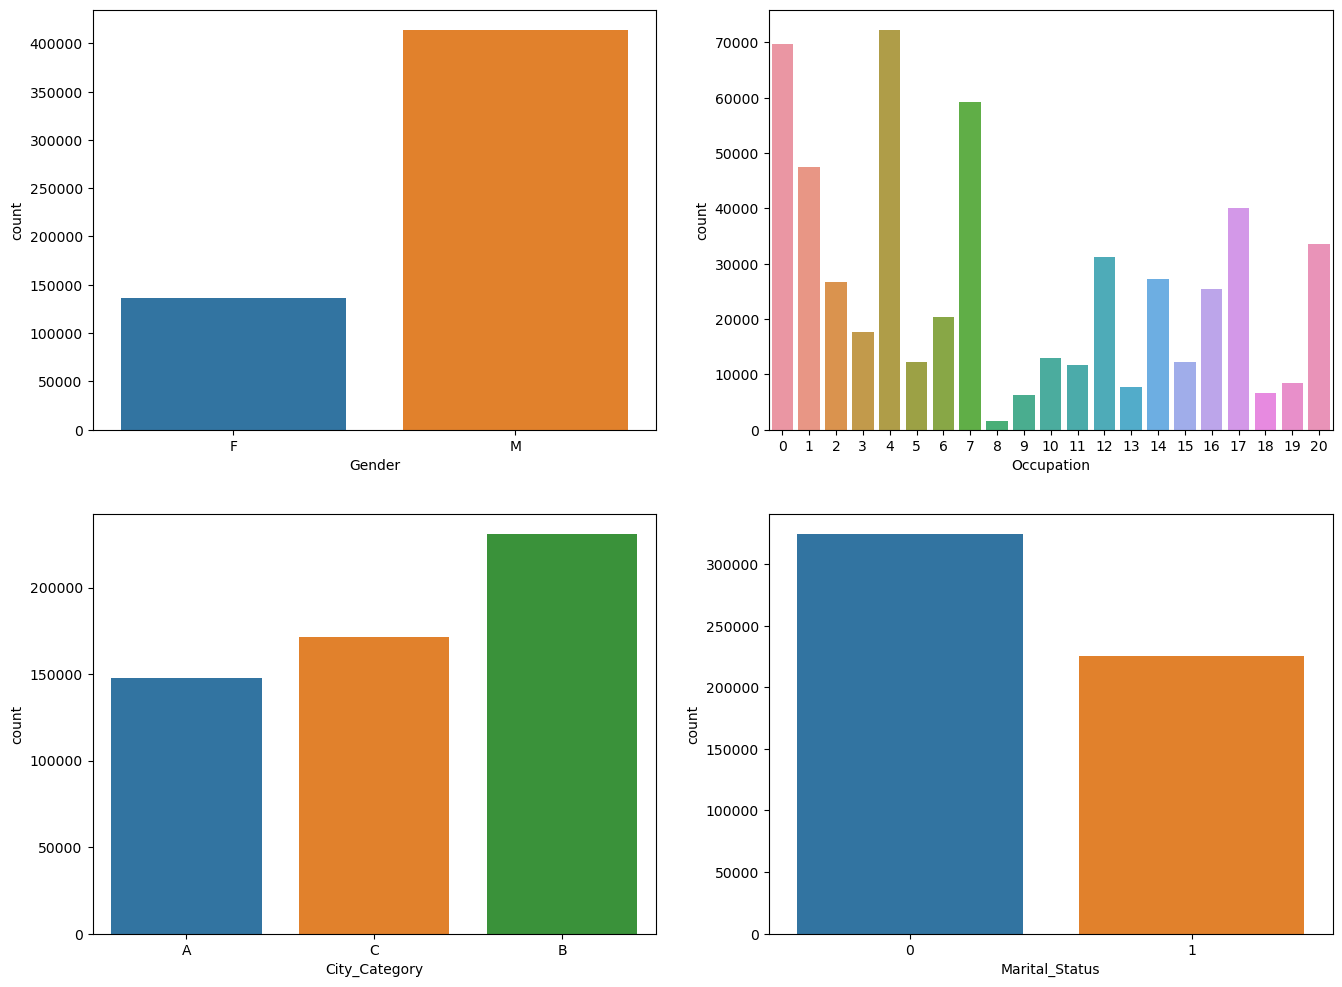

In [360]:
cat_col=['Gender','Occupation','City_Category','Marital_Status','Product_Category']
fig,axs=plt.subplots(nrows=2,ncols=2,figsize=(16,12))
sns.countplot(data=df,x='Gender',ax=axs[0,0])
sns.countplot(data=df,x='Occupation',ax=axs[0,1])
sns.countplot(data=df,x='City_Category',ax=axs[1,0])
sns.countplot(data=df,x='Marital_Status',ax=axs[1,1])
plt.show()

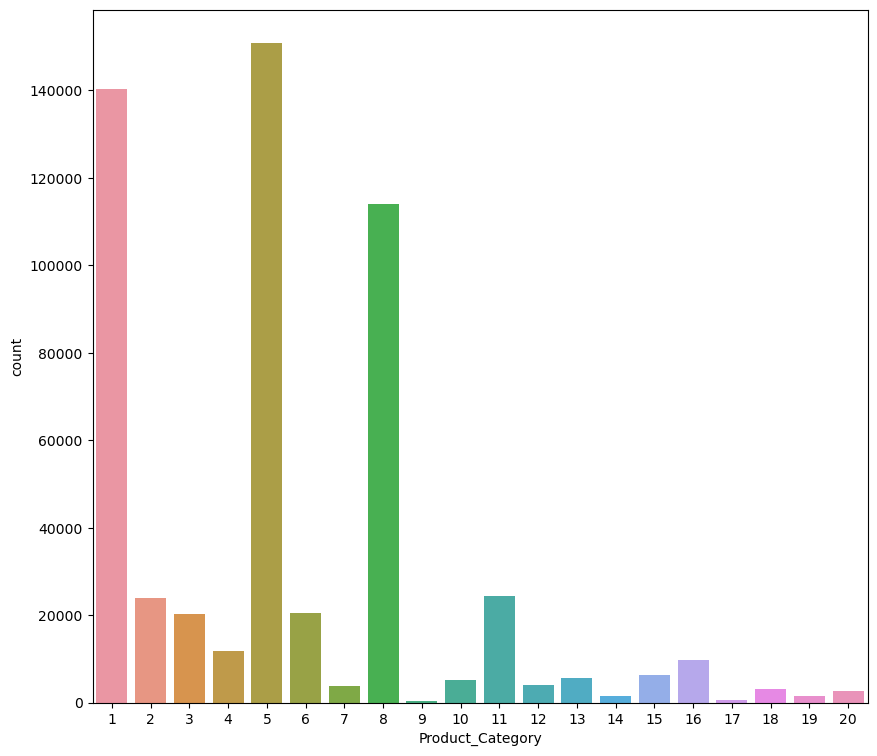

In [361]:
plt.figure(figsize=(10,9))
sns.countplot(data=df,x='Product_Category')
plt.show()

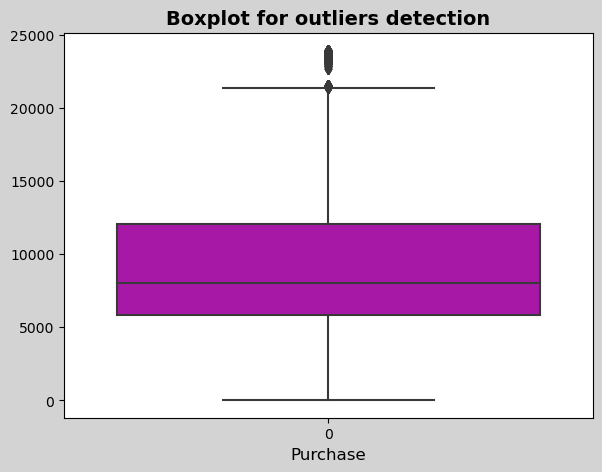

In [362]:
fig = plt.figure(figsize=(15,5))
fig.set_facecolor("lightgrey")
plt.subplot(1,2,1)
sns.boxplot(df["Purchase"],color='m')
plt.title("Boxplot for outliers detection", fontweight="bold",fontsize=14)
plt.xlabel('Purchase', fontsize=12)
plt.show()

In [303]:
df.groupby("User_ID")["Purchase"].sum()

User_ID
1000001     334093
1000002     810472
1000003     341635
1000004     206468
1000005     821001
            ...   
1006036    4116058
1006037    1119538
1006038      90034
1006039     590319
1006040    1653299
Name: Purchase, Length: 5891, dtype: int64

<Axes: xlabel='Purchase', ylabel='Count'>

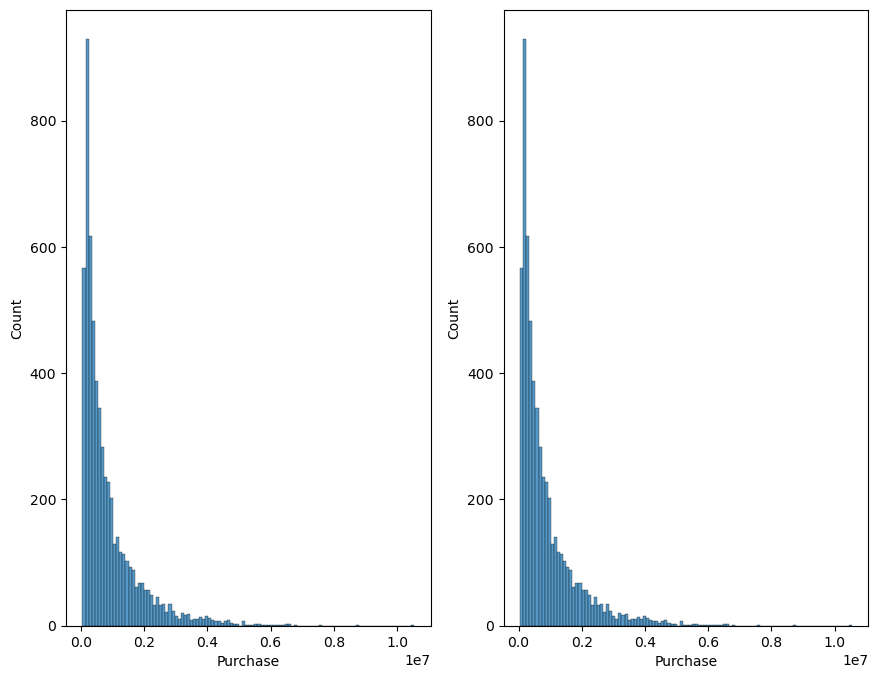

In [302]:
fig=plt.figure(figsize=(16,8))
plt.subplot(1,3,1)
sns.histplot(df.groupby("User_ID")["Purchase"].sum())
plt.subplot(1,3,2)
sns.histplot(df.groupby(["Gender","User_ID"])["Purchase"].sum())

In [79]:
product_grp=df.groupby("Product_ID").count()
product_grp

,User_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
Product_ID,,,,,,,,,
P00000142,1152,1152,1152,1152,1152,1152,1152,1152,1152
P00000242,376,376,376,376,376,376,376,376,376
P00000342,244,244,244,244,244,244,244,244,244
P00000442,92,92,92,92,92,92,92,92,92
P00000542,149,149,149,149,149,149,149,149,149
...,...,...,...,...,...,...,...,...,...
P0099442,200,200,200,200,200,200,200,200,200
P0099642,13,13,13,13,13,13,13,13,13
P0099742,126,126,126,126,126,126,126,126,126


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, '(-11.949, 2406.9]'),
  Text(1, 0, '(2406.9, 4801.8]'),
  Text(2, 0, '(4801.8, 7196.7]'),
  Text(3, 0, '(7196.7, 9591.6]'),
  Text(4, 0, '(9591.6, 11986.5]'),
  Text(5, 0, '(11986.5, 14381.4]'),
  Text(6, 0, '(14381.4, 16776.3]'),
  Text(7, 0, '(16776.3, 19171.2]'),
  Text(8, 0, '(19171.2, 21566.1]'),
  Text(9, 0, '(21566.1, 23961.0]')])

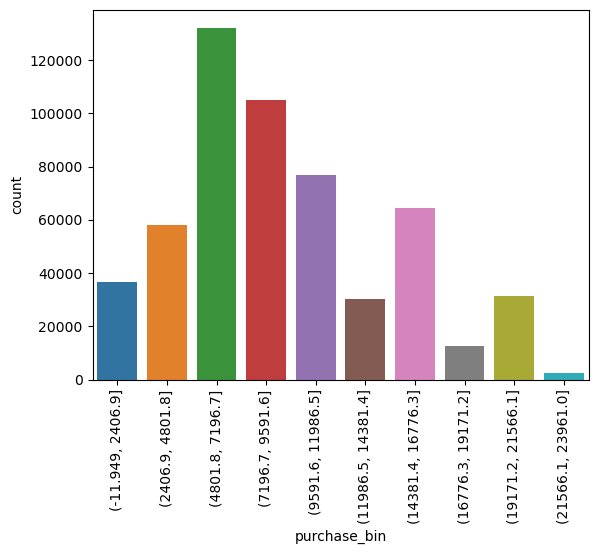

In [154]:
df["purchase_bin"]=pd.cut(df["Purchase"],bins=10)
df.drop_duplicates("Product_ID",keep="first")
sns.countplot(data=df,x="purchase_bin")
plt.xticks(rotation=90)

### **Confidence Interval of 95% of male customers based on product and purchase amount**

In [334]:
df_male=df[df["Gender"]=="M"]
df_sample=df_male.groupby("User_ID")["Purchase"].sum()
df_sample

User_ID
1000002     810472
1000003     341635
1000004     206468
1000005     821001
1000007     234668
            ...   
1006030     737361
1006032     517261
1006033     501843
1006034     197086
1006040    1653299
Name: Purchase, Length: 4225, dtype: int64

In [335]:
df_sample.sort_values(ascending=False)

User_ID
1004277    10536909
1001680     8699596
1002909     7577756
1001941     6817493
1000424     6573609
             ...   
1004636       57805
1003275       55960
1002111       54536
1003883       49349
1000094       49288
Name: Purchase, Length: 4225, dtype: int64

<Axes: ylabel='Count'>

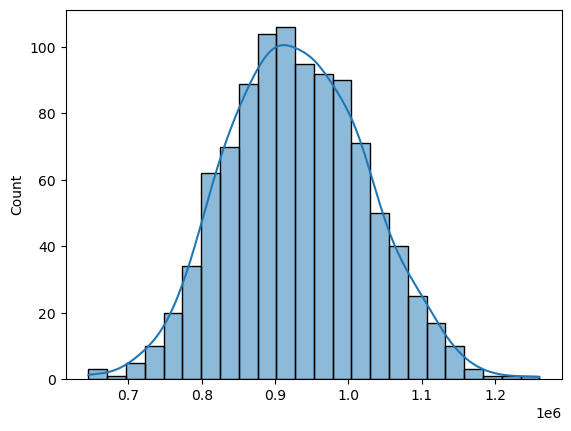

In [339]:
#creating samples and mean on the purchase column
n=100
sample_means_m=[df_sample.sample(n).mean() for i in range(1000)]
sns.histplot(sample_means_m,kde=True)

In [337]:
Average_m=df_sample.mean()
Average_m

925344.4023668639

In [340]:
Efficient_sample_mean_m=np.mean(sample_means_m)
Efficient_sample_mean_m

929891.17903

#### So the average purchase done by male customers with sample size 100 and with 1000 samplings is found to be around 929891 which is close to the actual mean.

In [342]:
standard_dev_m=np.std(df_sample)
standard_error_m=standard_dev_m/np.sqrt(n)
standard_error_m

98571.34276071227

#### The standard error for the 1000 samples with size 100 is 98571.34

### **Probability of male customers buying products worth more than 10000 from a random of 100 customers picked**

In [349]:
# calculating the Z-score
# Let x be 10000 as we want to calculate the probability more than 10000 dollars worth
x=300000
z=(x-Average_m)/standard_error_m
norm.cdf(1-z)

0.9999999999998964

In [350]:
x=1000000
z=(x-Average_m)/standard_error_m
norm.cdf(1-z)

0.5958515449642755

In [351]:
# for finding 95% confidence interval, let's find the x1 and x2 values.
z1=norm.ppf(0.025)
z1

-1.9599639845400545

In [352]:
z2=norm.ppf(1-0.025)
z2

1.959963984540054

In [354]:
x1=(z1*standard_error_m)+Average_m
x1

732148.1206481148

In [353]:
x2=(z2*standard_error_m)+Average_m
x2

1118540.684085613

The confidence Interval for 95% male population spending range is [732148,1118540]

So from the obtained confidence interval it is clear that, 95% of the female customers are spending with the a range 732148 and 1118540                                     

### **Confidence Interval of 95% of female customers based on product and the purchase amount**

In [311]:
df_female=df[df["Gender"]=="F"]
df_sample=df_female.groupby("User_ID")["Purchase"].sum()
df_sample

User_ID
1000001     334093
1000006     379930
1000010    2169510
1000011     557023
1000016     150490
            ...   
1006035     956645
1006036    4116058
1006037    1119538
1006038      90034
1006039     590319
Name: Purchase, Length: 1666, dtype: int64

In [313]:
df_sample.sort_values(ascending=False)

User_ID
1003539    6187094
1003224    5673106
1001088    5628655
1001448    5136424
1003292    4799461
            ...   
1003291      55372
1005944      53996
1004991      52371
1005117      49668
1004464      46681
Name: Purchase, Length: 1666, dtype: int64

<Axes: ylabel='Count'>

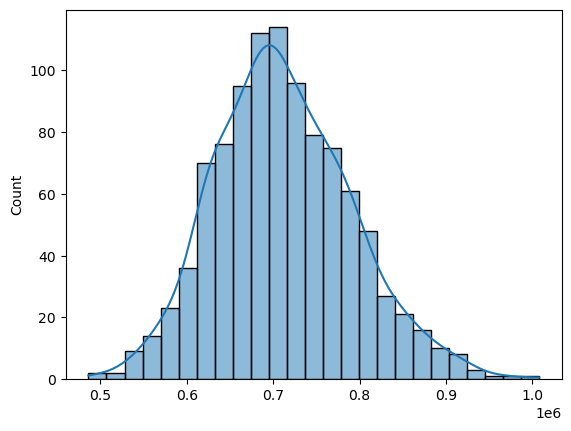

In [320]:
#creating samples and mean on the purchase column
n=100
sample_means_f=[df_sample.sample(n).mean() for i in range(1000)]
sns.histplot(sample_means_f,kde=True)

In [315]:
Average_f=df_sample.mean()
Average_f

712024.3949579832

In [322]:
Efficient_sample_mean_f=np.mean(sample_means_f)
Efficient_sample_mean_f

711899.34149

In [323]:
standard_dev_f=np.std(df_sample)
standard_error_f=standard_dev_f/np.sqrt(n)
standard_error_f

80712.83816336752

#### The standard error for 1000 samples with size 100 is around 80712.84

#### **Probability of female customers buying products worth more than 10000 from a random of 100 customers picked**

In [328]:
# calculating the Z-score
# Let x be 10000 as we want to calculate the probability more than 10000 dollars worth
x=400000
z=(x-Average_f)/standard_error_f
norm.cdf(1-z)

0.9999994301942449

99.99% of female customers are spending more than 400000 on an average.

In [329]:
x=1000000
z=(x-Average_f)/standard_error_f
norm.cdf(1-z)

0.00511578405576325

whereas only 0.5% of the female customers are spending more than 1000000

In [330]:
# for finding 95% confidence interval, let's find the x1 and x2 values.
z1=norm.ppf(0.025)
z1

-1.9599639845400545

In [331]:
z2=norm.ppf(1-0.025)
z2

1.959963984540054

In [332]:
x1=(z1*standard_error_f)+Average_f
x1

553830.1390677728

In [333]:
x2=(z2*standard_error_f)+Average_f
x2

870218.6508481936

The confidence Interval for 95% female population buying products range from purchase amount is [553830,870218]

So from the obtained confidence interval it is clear that, 95% of the female customers are spending with the a range 553830 and 870218

In [203]:
# Now let's find the products that has the purchase amount within the range of [7413,10055]

product_female=df_female[(df_female["Purchase"]>=7413) & (df_female["Purchase"]<=10055)]
product_female=product_female.drop_duplicates(subset=["Product_ID"])
product_female["Product_ID"].sort_values(ascending=True)    

14848     P00000142
28496     P00000242
142004    P00000342
415824    P00000442
157501    P00000542
            ...    
6618       P0099342
142461     P0099442
228910     P0099642
44160      P0099742
93097      P0099842
Name: Product_ID, Length: 2500, dtype: object

* 95% of the time when a female customer wants to purchase anything, that will be under this above product ids list.

## **Confidence Interval of 95% of overall population based on product and the purchase amount**

In [188]:
df

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase,purchase_bin
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370,"(7196.7, 9591.6]"
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200,"(14381.4, 16776.3]"
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422,"(-11.949, 2406.9]"
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057,"(-11.949, 2406.9]"
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969,"(7196.7, 9591.6]"
...,...,...,...,...,...,...,...,...,...,...,...
550063,1006033,P00372445,M,51-55,13,B,1,1,20,368,"(-11.949, 2406.9]"
550064,1006035,P00375436,F,26-35,1,C,3,0,20,371,"(-11.949, 2406.9]"
550065,1006036,P00375436,F,26-35,15,B,4+,1,20,137,"(-11.949, 2406.9]"
550066,1006038,P00375436,F,55+,1,C,2,0,20,365,"(-11.949, 2406.9]"


In [189]:
df["Purchase"].sort_values(ascending=False)

370891    23961
93016     23961
87440     23961
503697    23960
321782    23960
          ...  
546379       12
546185       12
547032       12
546181       12
549221       12
Name: Purchase, Length: 550068, dtype: int64

<Axes: ylabel='Count'>

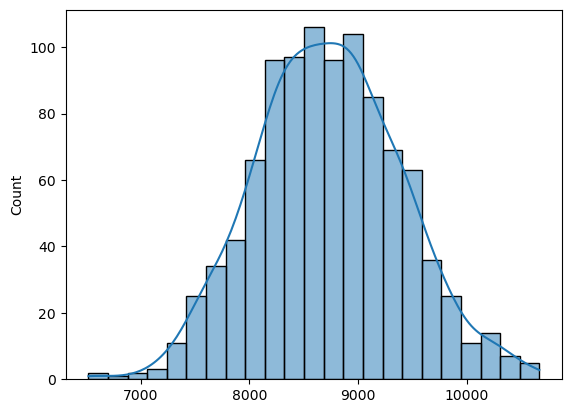

In [190]:
#creating samples and mean on the purchase column
n=50
sample_means=[df["Purchase"].sample(n).mean() for i in range(1000)]
sns.histplot(sample_means_f,kde=True)

In [192]:
Average=df["Purchase"].mean()
Average

9263.968712959126

In [193]:
Efficient_sample_mean=np.mean(sample_means)
Efficient_sample_mean

9249.35944

In [194]:
standard_dev=np.std(df["Purchase"])
standard_error=standard_dev/np.sqrt(n)
standard_error

710.368074752602

#### The standard error for 1000 samples with size 50 is around 710

#### **Probability of customers buying products worth more than 10000 from a random of 50 customers picked**

In [196]:
# calculating the Z-score
# Let x be 10000 as we want to calculate the probability more than 10000 dollars worth
x=5000
z=(x-Average)/standard_error
norm.cdf(1-z)

0.9999999999987427

From the purchase amount 5000 onwards 99.99% of customers are buying products.

In [198]:
x=10000
z=(x-Average)/standard_error
norm.cdf(1-z)

0.48559068994240306

whereas only 48% of the customers are tend to buy products that are worth more than 10000, which means the percentage is impacted because of the low percentage of female customer who buy products > 10000

In [199]:
# for finding 95% confidence interval, let's find the x1 and x2 values.
z1=norm.ppf(0.025)
z1

-1.9599639845400545

In [200]:
z2=norm.ppf(1-0.025)
z2

1.959963984540054

In [201]:
x1=(z1*standard_error)+Average
x1

7871.672870676968

In [202]:
x2=(z2*standard_error_f)+Average_f
x2

10055.94626971902

The confidence Interval for 95% overall population buying products range from purchase amount is [7871,10055]

So from the obtained confidence interval it is clear that, 95% of the customers are buying product with purchase amount range 7871 and 10055

In [ ]:
# Now let's find the products that has the purchase amount within the range of [7413,10055]

product=df[(df["Purchase"]>=7413) & (df["Purchase"]<=10055)]
product=product_male.drop_duplicates(subset=["Product_ID"])
product["Product_ID"].sort_values(ascending=True)  

### **Confidence Interval of 99% of overall population based on product and the purchase amount**

In [249]:
z1=norm.ppf(0.005)
z1

-2.575829303548901

In [250]:
z2=norm.ppf(1-0.005)
z2

2.5758293035489004

In [251]:
x1=(z1*standard_error)+Average
x1

7434.181809705758

In [252]:
x2=(z2*standard_error)+Average
x2

11093.755616212493

So from the obtained confidence interval it is clear that, 99% of the customers are buying product with purchase amount range 7434 and 10656

### **Confidence Interval of 99% of customers based on marital status.**

#### **Calculate Confidence Interval for unmarried customers**

In [254]:
df_married=df[df["Marital_Status"]==1]
df_married

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase,purchase_bin
6,1000004,P00184942,M,46-50,7,B,2,1,1,19215,"(19171.2, 21566.1]"
7,1000004,P00346142,M,46-50,7,B,2,1,1,15854,"(14381.4, 16776.3]"
8,1000004,P0097242,M,46-50,7,B,2,1,1,15686,"(14381.4, 16776.3]"
9,1000005,P00274942,M,26-35,20,A,1,1,8,7871,"(7196.7, 9591.6]"
10,1000005,P00251242,M,26-35,20,A,1,1,5,5254,"(4801.8, 7196.7]"
...,...,...,...,...,...,...,...,...,...,...,...
550060,1006026,P00371644,M,36-45,6,C,1,1,20,494,"(-11.949, 2406.9]"
550061,1006029,P00372445,F,26-35,1,C,1,1,20,599,"(-11.949, 2406.9]"
550063,1006033,P00372445,M,51-55,13,B,1,1,20,368,"(-11.949, 2406.9]"
550065,1006036,P00375436,F,26-35,15,B,4+,1,20,137,"(-11.949, 2406.9]"


In [255]:
df_married["Purchase"].sort_values(ascending=False)

87440     23961
321782    23960
349658    23960
292083    23960
437804    23959
          ...  
546325       12
546301       12
548814       12
549735       12
548667       12
Name: Purchase, Length: 225337, dtype: int64

<Axes: ylabel='Count'>

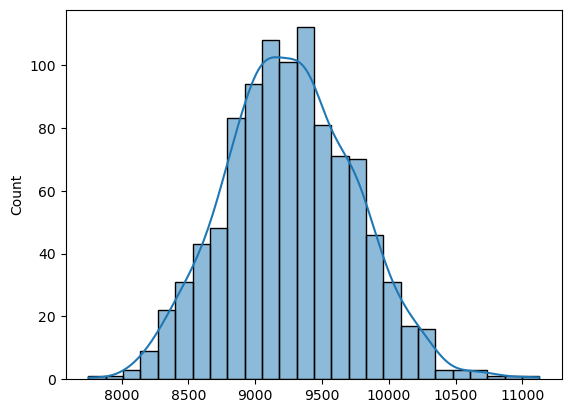

In [257]:
#creating samples and mean on the purchase column
n=100
sample_means=[df_married["Purchase"].sample(n).mean() for i in range(1000)]
sns.histplot(sample_means,kde=True)

In [258]:
Average=df_married["Purchase"].mean()
Average

9261.174574082374

In [259]:
Efficient_sample_mean_m=np.mean(sample_means)
Efficient_sample_mean_m

9263.630399999998

#### So the average purchase done by married customers with sample size 100 and with 1000 samplings is found to be around 9263 which is close to the actual mean.

In [260]:
standard_dev=np.std(df_married["Purchase"])
standard_error=standard_dev/np.sqrt(n)
standard_error

501.68862457931834

#### The standard error for the 1000 samples with size 100 is 501.689

### **Probability of married customers buying products worth more than 10000 from a random of 100 customers picked**

In [263]:
x=6000
z=(x-Average)/standard_error
norm.cdf(1-z)

0.9999999999999681

From the purchase amount 6000 onwards 99.99% of married customers are buying products.

In [264]:
# calculating the Z-score
# Let x be 10000 as we want to calculate the probability more than 10000 dollars worth
x=10000
z=(x-Average)/standard_error
norm.cdf(1-z)

0.3182217285182593

whereas only 31% of the married customers are tend to buy products that are worth more than 10000

In [266]:
# for finding 99% confidence interval, let's find the x1 and x2 values.
z1=norm.ppf(0.005)
z1

-2.575829303548901

In [267]:
z2=norm.ppf(1-0.005)
z2

2.5758293035489004

In [268]:
x1=(z1*standard_error_f)+Average_f
x1

6997.9774137160775

In [269]:
x2=(z2*standard_error_f)+Average_f
x2

10471.154116594873

The confidence Interval for 99% married customers buying products range from purchase amount is [6997,10471]

So from the obtained confidence interval it is clear that, 99% of the married customers are buying product with purchase amount range [6997,10471]

In [271]:
# Now let's find the products that has the purchase amount within the range of [6997,10471]

product_married=df_married[(df_married["Purchase"]>=6997) & (df_married["Purchase"]<=10471)]
product_married=product_married.drop_duplicates(subset=["Product_ID"])
product_married["Product_ID"].sort_values(ascending=True)  

11224     P00000142
11232     P00000242
98104     P00000342
31271     P00000442
22984     P00000542
            ...    
232571     P0099442
228910     P0099642
1160       P0099742
9491       P0099842
324997     P0099942
Name: Product_ID, Length: 2902, dtype: object

* 99% of the time when a married customer wants to purchase anything, that will be under this above product ids list.

#### **Calculate Confidence Interval for unmarried customers**

In [272]:
df_unmarried=df[df["Marital_Status"]==0]
df_unmarried

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase,purchase_bin
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370,"(7196.7, 9591.6]"
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200,"(14381.4, 16776.3]"
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422,"(-11.949, 2406.9]"
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057,"(-11.949, 2406.9]"
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969,"(7196.7, 9591.6]"
...,...,...,...,...,...,...,...,...,...,...,...
550056,1006022,P00375436,M,26-35,17,C,4+,0,20,254,"(-11.949, 2406.9]"
550059,1006025,P00370853,F,26-35,1,B,1,0,19,48,"(-11.949, 2406.9]"
550062,1006032,P00372445,M,46-50,7,A,3,0,20,473,"(-11.949, 2406.9]"
550064,1006035,P00375436,F,26-35,1,C,3,0,20,371,"(-11.949, 2406.9]"


In [273]:
df_unmarried["Purchase"].sort_values(ascending=False)

93016     23961
370891    23961
503697    23960
298378    23959
416883    23958
          ...  
547538       12
549009       12
549021       12
549989       12
547885       12
Name: Purchase, Length: 324731, dtype: int64

<Axes: ylabel='Count'>

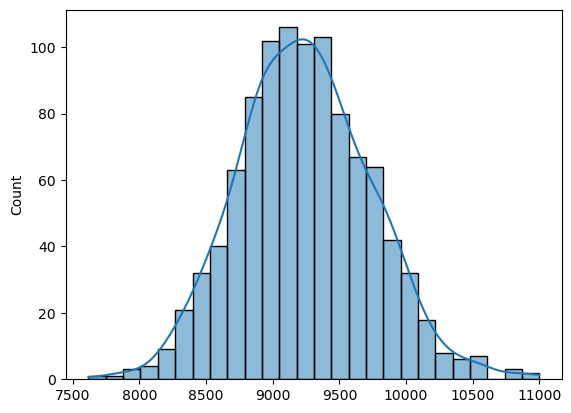

In [276]:
#creating samples and mean on the purchase column
n=100
sample_means_f=[df_unmarried["Purchase"].sample(n).mean() for i in range(1000)]
sns.histplot(sample_means_f,kde=True)

In [277]:
Average_u=df_unmarried["Purchase"].mean()
Average_u

9265.907618921507

In [278]:
Efficient_sample_mean_u=np.mean(sample_means)
Efficient_sample_mean_u

9263.630399999998

In [279]:
standard_dev_u=np.std(df_unmarried["Purchase"])
standard_error_u=standard_dev_u/np.sqrt(n)
standard_error_u

502.7340117880186

#### The standard error for 1000 samples with size 100 is around 502.734

#### **Probability of unmarried customers buying products worth more than 10000 from a random of 100 customers picked**

In [282]:
# calculating the Z-score
# Let x be 4000 - 10000 as we want to calculate the probability more than 10000 dollars worth
x=6000
z=(x-Average_u)/standard_error_u
norm.cdf(1-z)

0.9999999999999671

From the purchase amount 6000 onwards 99.99% of unmarried customers are buying products.

In [283]:
x=10000
z=(x-Average_u)/standard_error_u
norm.cdf(1-z)

0.32268620910285534

whereas only 32% of the unmarried customers are tend to buy products that are worth more than 10000

In [285]:
# Finding the range of purchase amount for 99% confidence interval.
z1=norm.ppf(0.005)
z2=norm.ppf(1-0.005)
x1=(z1*standard_error)+Average
x2=(z2*standard_error)+Average
x1,x2

(7968.910313633822, 10553.438834530925)

So from the obtained confidence interval it is clear that, 99% of the customers are buying product with purchase amount range 7968.9 and 10553.4

### **Observations:**

    * 99% of both married and unmarried customers are buying products with purchase amount more than 6000
    * Also customers tend to buy products with purchase amount more than greater 10000 is also on an average of 31 to 32 % for both married and unmarried customers.
    * For 99% of the customers both the married and unmarried, the purchase amount ranges from 6997-10553. From this we can conclude that marital status doesnt affect the transactions much.

## **Recommendations:**
1.We can clearly see that Males and Singles have dominated in the aspect of number of transactions , so adding items that match with usage of each other by placing that combination products at immediate shelfs can increase the sales from Males and singles .

2.For females and Partnered customers , to increase the number of transactions , which also means the number of times they visit to walmart to shop , installing babycare facility for customers , play zone for kids and also foods like snacks and beverage will help to attract customers to spend time in walmart as usually taking care of kids during shopping always seem a burden , also with food Recommendations available it becomes a chill spot after shopping. People who are young and middle aged seem to do more shopping , to improve the
transactions in remaining age category like old age people 45 and above years , special billing lines could help as there would be less waiting time , less standing in line , hence old age employee friendly.

3. Product categories that have low transactions like 14,17,9 can be considered as less used items , which can be stocked in low quantities and Product categories that have high transactions like 5,1,3 have high usage , hence have to be restocked frequently .

4.City category A has very low transactions which can be improved by creating Seasonal offers and digital marketing , alsohome delivery on a minimum spend.

5.Occupation more than 7 have very low number of transaction frequency , where we can assume as the occupation rate increases free time may decrease to do live shopping, hence adapting a local e-commerce app or website , where the customers add items to their cart and pay the bill with additional delivery fee and the items can be delivered to home with in 1 day.

6.Products with cost range of 500 to 10000 have more transactions which can be considered as frequently used items , these items are to be restocked frequently and creating a combo with one item that has high transactions and other has low transactions may help in boosting the lower transaction item sales.

7.The range of purchase in city category “C” is higher compared to other categories, decreasing the offers in this area and investing it